In [1]:
import rospy


In [2]:
rospy.init_node('festeshi')

In [3]:
import tf
import cv2
import rospy  
import tf2_ros                                    
#from segmentation.srv import Segmentation, SegmentationResponse 
#from segmentation.msg import *
from cv_bridge import CvBridge
#from object_classification.srv import *
import numpy as np
import ros_numpy
import os
import matplotlib.pyplot as plt
import rospkg
import yaml
from sensor_msgs.msg import Image , LaserScan , PointCloud2
from geometry_msgs.msg import TransformStamped, Pose
from tf2_sensor_msgs.tf2_sensor_msgs import do_transform_cloud
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA


In [4]:
#-----------------------------------------------------------------
def write_tf(pose, q, child_frame="" , parent_frame='map'):
    #  pose = trans  q = quaternion  , childframe =""
    # format  write the transformstampled message
    t= TransformStamped()
    t.header.stamp = rospy.Time.now()
    #t.header.stamp = rospy.Time(0)
    t.header.frame_id =parent_frame
    t.child_frame_id =  child_frame
    t.transform.translation.x = pose[0]
    t.transform.translation.y = pose[1]
    t.transform.translation.z = pose[2]
    #q = tf.transformations.quaternion_from_euler(eu[0], eu[1], eu[2])
    t.transform.rotation.x = q[0]
    t.transform.rotation.y = q[1]
    t.transform.rotation.z = q[2]
    t.transform.rotation.w = q[3]
    return t
    
#-----------------------------------------------------------------
def read_tf(t):
    # trasnform message to np arrays
    pose=np.asarray((
        t.transform.translation.x,
        t.transform.translation.y,
        t.transform.translation.z
        ))
    quat=np.asarray((
        t.transform.rotation.x,
        t.transform.rotation.y,
        t.transform.rotation.z,
        t.transform.rotation.w
        ))
    
    return pose, quat

In [11]:
rospack = rospkg.RosPack()
tfBuffer = tf2_ros.Buffer()
listener2 = tf2_ros.TransformListener(tfBuffer)
listener = tf.TransformListener()

broadcaster = tf2_ros.TransformBroadcaster()
tf_static_broadcaster = tf2_ros.StaticTransformBroadcaster()

#tf_listener = tf.TransformListener()
#broadcaster= tf.TransformBroadcaster()
#tf_static_broadcaster= tf2_ros.StaticTransformBroadcaster()
#pub = rospy.Publisher('/segmented_images', Image, queue_size=1)
bridge=CvBridge()
Pca=PCA()

In [12]:
points_msg=rospy.wait_for_message("/points",PointCloud2,timeout=5)
points_data = ros_numpy.numpify(points_msg)    
image_data = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]   
image=cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
image = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    

In [13]:
import matplotlib.pyplot as plt

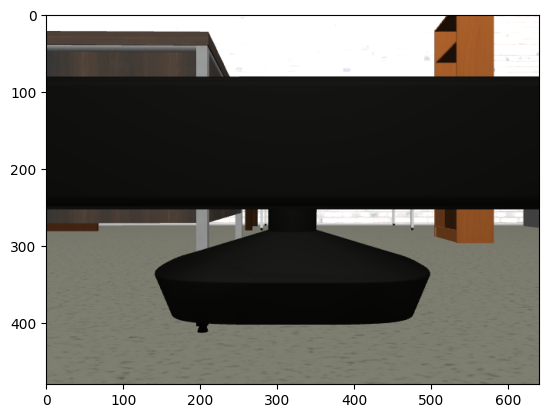

In [14]:
plt.imshow(rgb_image)

In [15]:
################
#CORRECT POINTS###################
################
try:
        trans = tfBuffer.lookup_transform('odom', 'camera_link', rospy.Time())
                    
        trans,rot=read_tf(trans)
        #print ("############head",trans,rot)
except (tf2_ros.LookupException, tf2_ros.ConnectivityException, tf2_ros.ExtrapolationException):
        print ( 'No head TF FOUND')
t= write_tf(trans,rot)
cloud_out = do_transform_cloud(points_msg, t)#-----------------------------------------------------------------
def write_tf(pose, q, child_frame="" , parent_frame='map'):
    #  pose = trans  q = quaternion  , childframe =""
    # format  write the transformstampled message
    t= TransformStamped()
    t.header.stamp = rospy.Time.now()
    #t.header.stamp = rospy.Time(0)
    t.header.frame_id =parent_frame
    t.child_frame_id =  child_frame
    t.transform.translation.x = pose[0]
    t.transform.translation.y = pose[1]
    t.transform.translation.z = pose[2]
    #q = tf.transformations.quaternion_from_euler(eu[0], eu[1], eu[2])
    t.transform.rotation.x = q[0]
    t.transform.rotation.y = q[1]
    t.transform.rotation.z = q[2]
    t.transform.rotation.w = q[3]
    return t
    
#-----------------------------------------------------------------
def read_tf(t):
    # trasnform message to np arrays
    pose=np.asarray((
        t.transform.translation.x,
        t.transform.translation.y,
        t.transform.translation.z
        ))
    quat=np.asarray((
        t.transform.rotation.x,
        t.transform.rotation.y,
        t.transform.rotation.z,
        t.transform.rotation.w
        ))
    
    return pose, quat
np_corrected=ros_numpy.numpify(cloud_out)
corrected=np_corrected.reshape(points_data.shape)

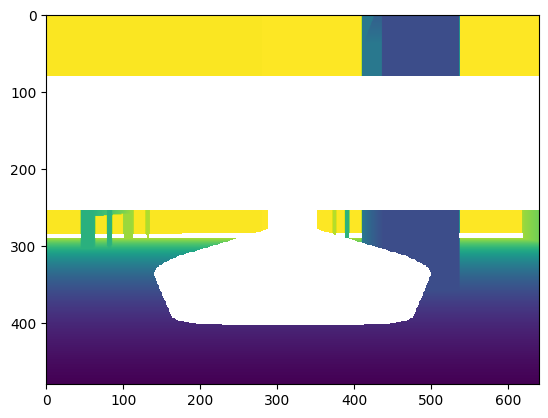

In [16]:
plt.imshow(corrected['z'])